# Converting the execution time in nanoseconds to dataframe

In [294]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import json

# Directory containing the JSON files
directory = './results-csvs'

# Dictionary to store DataFrames
dfs = {}
filenames = []

# Iterate through files ending with .json in the specified directory
counter = 0
for filename in os.listdir(directory):
    if filename.startswith('exec-time-history-') and filename.endswith('.json'):
        counter += 1
        print(f'{counter} > Reading file: {filename.split("history-")[1]}')
        filenames.append(filename.split("history-")[1].split(".json")[0])
        print(filenames[counter-1])
        fp = os.path.join(directory, filename)
        # Read JSON file into a DataFrame
        dfs[str(counter)] = pd.read_json(fp)

1 > Reading file: itc-70_to_nearest-hospital.json
itc-70_to_nearest-hospital
2 > Reading file: itc-70_to_rs-umum-veteran-patmasari.json
itc-70_to_rs-umum-veteran-patmasari
3 > Reading file: itc-80_to_nearest-hospital.json
itc-80_to_nearest-hospital
4 > Reading file: itc-80_to_rs-umum-veteran-patmasari.json
itc-80_to_rs-umum-veteran-patmasari


In [295]:
dfs['1'].describe()

,greedy,bfs,dijkstra,astar
count,250.000000,250.000000,2.500000e+02,250.000000
mean,4812.000000,9615.600000,4.051720e+04,33898.000000
std,1929.046626,37502.199623,8.649986e+04,23608.431293
min,3800.000000,5400.000000,2.820000e+04,28800.000000
25%,4000.000000,5800.000000,2.930000e+04,29900.000000
50%,4000.000000,6700.000000,2.990000e+04,30300.000000
75%,4300.000000,7875.000000,3.050000e+04,30800.000000
max,18800.000000,599400.000000,1.299700e+06,240300.000000


In [296]:
# Draw boxplots
def draw_boxplots(dfs, filenames):
    for i in range(len(dfs)):
        print(f'Plotting {filenames[i]}')
        sns.set(style="whitegrid")
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=dfs[str(i+1)], linewidth=1.5)
        plt.title(f'Execution Time History: {filenames[i]}')
        plt.ylabel('Execution Time (s)')
        plt.xlabel('Iteration')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

Plotting itc-70_to_nearest-hospital


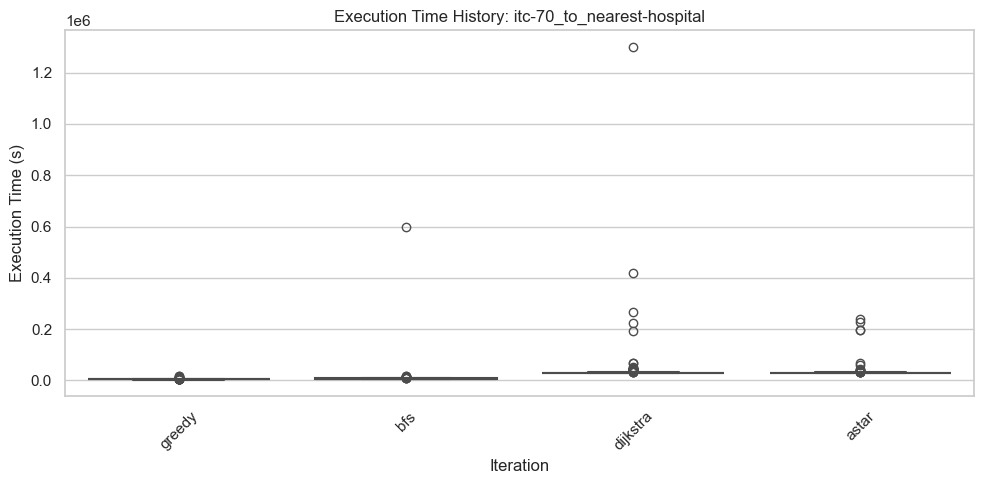

Plotting itc-70_to_rs-umum-veteran-patmasari


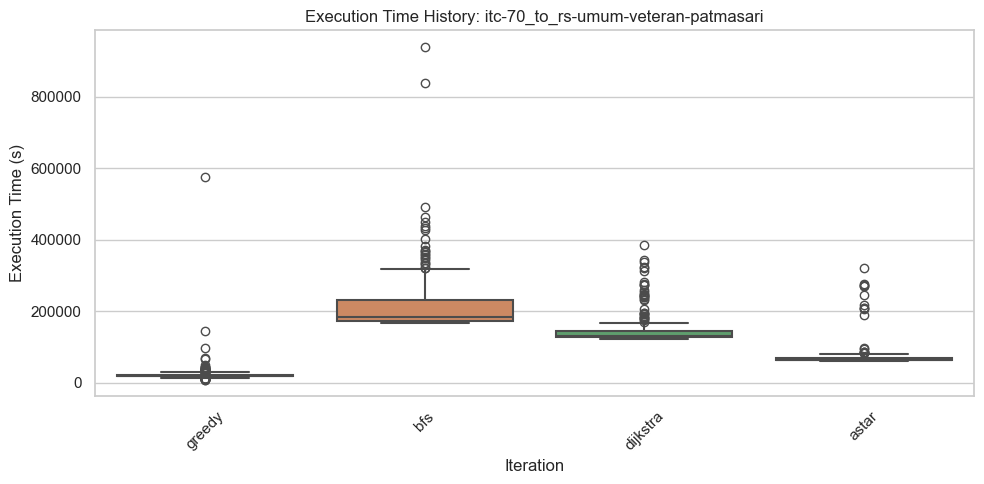

Plotting itc-80_to_nearest-hospital


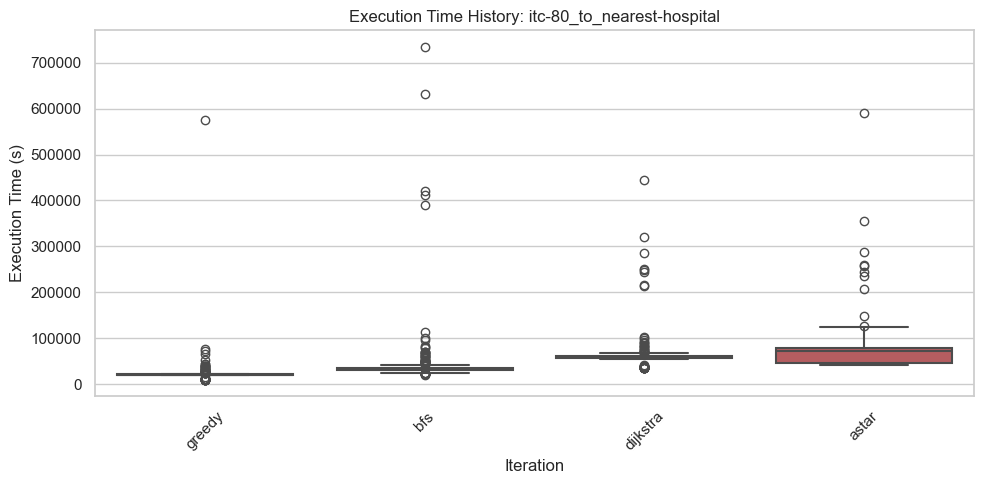

Plotting itc-80_to_rs-umum-veteran-patmasari


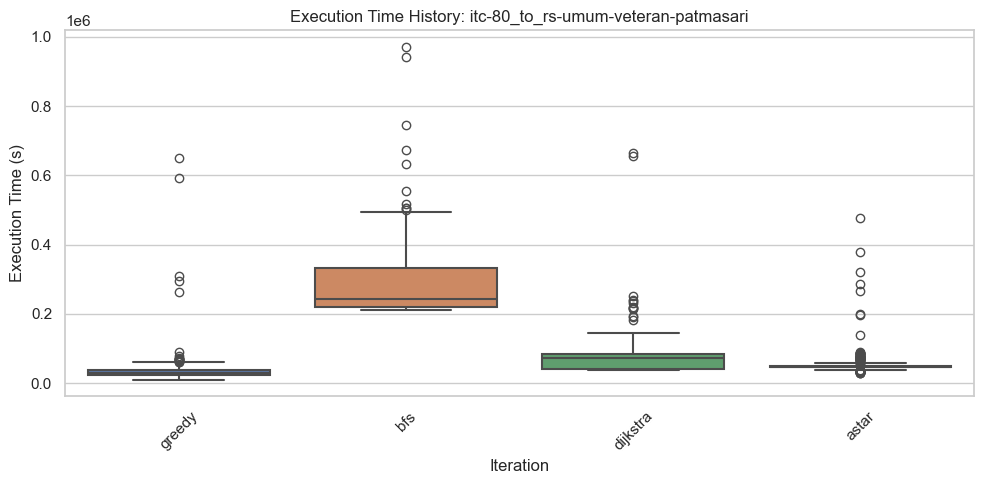

In [297]:
draw_boxplots(dfs, filenames)

In [298]:
def plot_data(df, context):
    # Plot the data as a line graph

    features = [
        'greedy',
        'dijkstra',
        'astar',
        'bfs'
    ]

    plt.figure(figsize=(10, 5))
    plt.plot(df[features])
    plt.grid(True)
    plt.xlabel('N iterasi')
    plt.ylabel('Waktu Eksekusi (nanosekon)')
    plt.title('Waktu Tercatat Selama Iterasi (%s)' % context.replace('_to_', ' Ke ').replace('nearest-hospital', 'Rumah Sakit Terdekat'))
    plt.legend(df.columns)
    # Calculate average execution time
    labels = [
        'Greedy Sederhana: {:,.2f} ns'.format(df['greedy'].mean()),
        'GBFS: {:,.2f} ns'.format(df['bfs'].mean()),
        'Dijkstra: {:,.2f} ns'.format(df['dijkstra'].mean()),
        'Astar: {:,.2f} ns'.format(df['astar'].mean())
    ]
    plt.legend(labels, loc='upper right')
    plt.show()

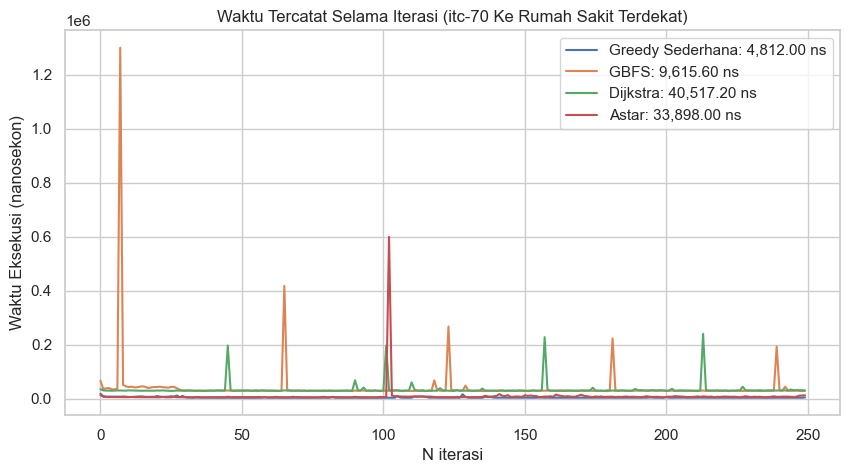

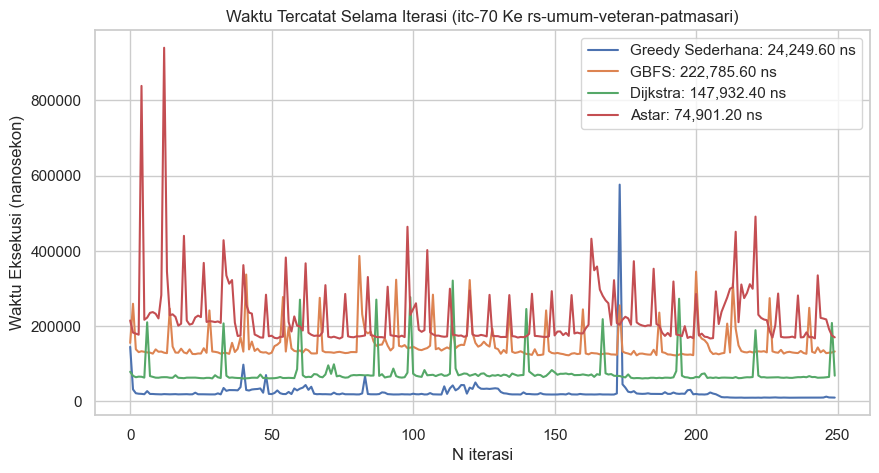

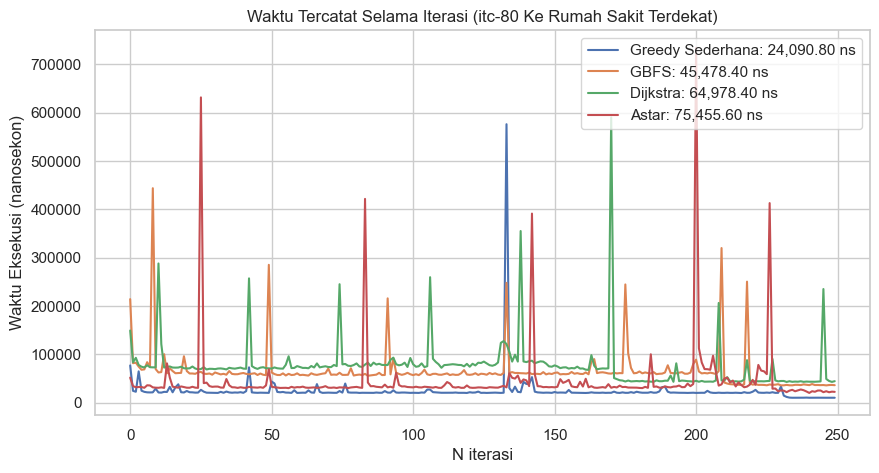

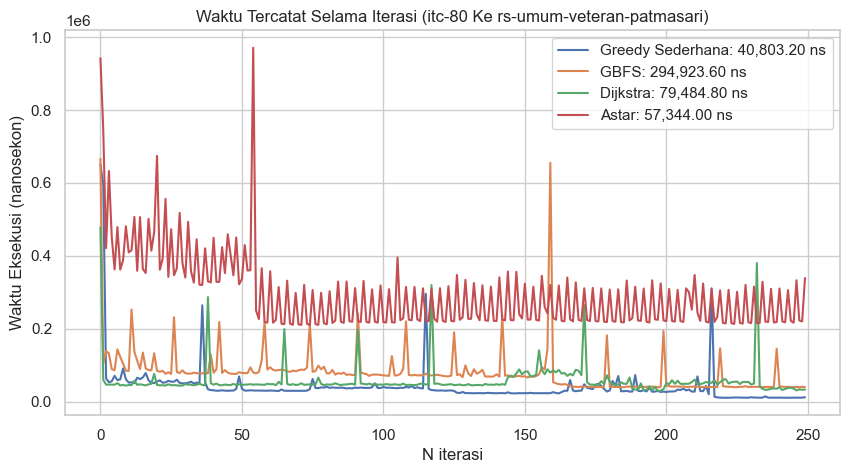

In [299]:
# Plot the data by iterating through the DataFrames and setting context from filenames
for key, df in dfs.items():
    plot_data(df, filenames[int(key)-1])

In [300]:
# Convert to csv
for key, df in dfs.items():
    df.to_csv(f'./results-csvs/{filenames[int(key)-1]}.csv', index=False)